## Introduction

This colab notebook is used as a means to analyze the prepared data from my [Colab Data Preparation Notebook](https://github.com/varelandrew/Homelessness/blob/main/Andrew_Varela_DATA_3320_Homelessness_Data_Preparation_Template.ipynb) sourced from [Markey Predictors of Homelessness](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) for local housing market factors and homelessness. The primary objectives are to identify market factors that have established effects on homelessness and construct and evaluate empirical models of community-level homelessness. I will be stating any questions, analyzing the results, and concluding with a statement based on my findings.

If you would like to dive deeper into the specific data set used, here is the link to the resource: [Data Set](https://github.com/varelandrew/Homelessness/blob/main/05b_analysis_file_update.csv)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint
import xgboost as xgb

# plot tree model
import graphviz

from sklearn import tree
from sklearn.model_selection import LeaveOneOut

## Load Clean Data

##### $\rightarrow$ Load the clean data set from Github. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Homelessness/main/clean_homeless.csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df.head()

,year,coc_number,rate_homeless,rate_sheltered,rate_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
0,2017,AK-500,37.931777,32.719520,5.212257,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
1,2017,AK-501,16.143340,13.013739,3.129602,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
2,2017,AL-500,11.395155,9.130733,2.264422,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
3,2017,AL-501,9.737114,5.479135,4.257979,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
4,2017,AL-502,5.843235,5.013873,0.829362,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618


## Analysis Questions

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, I need to ask specific questions about the data.

##### $\rightarrow$ List your questions about the data that will help you solve the problem.
1. What factors have the biggest effect on homelessness?
2. What method of analysis was the most effective to use for this project?
3. What are the best predictors for the rate of homelessness?

## Analysis

First I need to prepare the data a bit more: I remove columns that won't help in the regression and then create my X and Y variables which make up my linear regression model.

In [ ]:
variable_remove = {"total_black", "total_latino_hispanic", "total_asian", "total_pacific_islander", "total_population_0_19", "total_population_65_plus", "total_female_population", "year", "rate_unsheltered", "rate_sheltered"}
df = df.drop(columns = variable_remove)

In [ ]:
X = df[df.columns.difference(['coc_number', 'rate_homeless', 'total_population', 'total_homeless'])]
Y = df['rate_homeless']

In [ ]:
scaler = RobustScaler().fit(X)
X = pd.DataFrame(data=scaler.transform(X), columns=X.columns.values, index=X.index)

In [ ]:
model = sm.OLS(Y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     14.25
Date:                Wed, 24 May 2023   Prob (F-statistic):           5.88e-44
Time:                        08:16:03   Log-Likelihood:                -1404.4
No. Observations:                 374   AIC:                             2871.
Df Residuals:                     343   BIC:                             2992.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Here we can conclude a few things from this model:
- The R-Squared value shows that approximately 55.5% of the variance in the rate of homelessness can be explained by the X values.

- There are only a few variables that have a significant p-value (p < 0.05) which includes: total_Jan_precipitation, suburban, share_overcrowded_units_2016, share_HUD_units, proportion_one_person_households, migration_4_year_change, log_median_rent, and high_housing_density. This means that these variables have the most impact on the rate of homelessness.

- The F-statistic value is 14.25 with a corresponding p-value of 5.88e-44 which indicates an overall statistically significant model.

### Train Test Split

Here I am splitting the data into training and testing sets.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15, random_state = 23)

Now I am performing the scaling transform on the predictors in the training and testing sets.

In [ ]:
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

Here I am finding the Mean Squared Error, Root Mean Squared Error, and the R-Squared value.

In [ ]:
MSE = mean_squared_error(Y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(Y_test, model.predict(sm.add_constant(X_test)))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), 'R-squared =', R_squared.round(3))

MSE = 307.76  RMSE = 17.543 R-squared = 0.418


What is outputted here are three different values that represent performance metrics for evaluating the regression model.

- MSE indicates that, on average, the squared difference between the predicted values and the actual values is 307.76. A lower MSE indicates better model performance, as it means the predictions are closer to the actual values. So this shows that this model isn't the best.

- RMSE indicates that, on average, the difference between the predicted values and the actual values is approximately 17.543. Like the MSE, a lower RMSE indicates better model performance, so another reinforcement that this model isn't the best.

- R-Squared indicates that approximately 41.8% of the variance in the rate of homelessness can be explained by the X values. Also not as high of a number.

### Lasso Regression

Here I am creating an array of possible alpha values and plotting a visualization to showcase the alpha values vs. the coefficients.

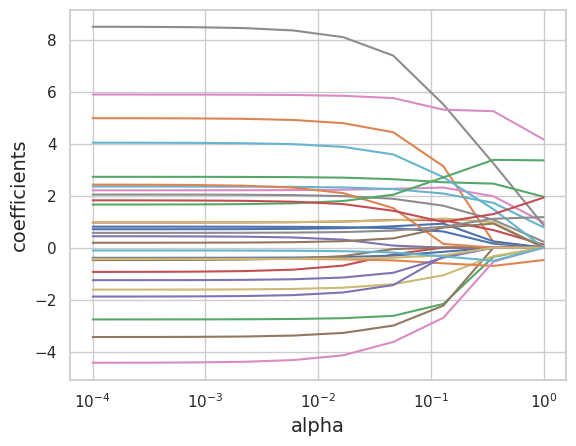

In [ ]:
alphasL = 10**np.linspace(-4,0,10)
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphasL:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphasL, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Here I am doing a 5-fold cross validation to find alpha

In [ ]:
lassocv = LassoCV(alphas = alphasL, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

0.12915496650148828

This is the estimated best alpha value which will be used to provide the optimal trade-off between model complexity and goodness of fit for the Lasso regression.

Here I am fitting the lasso model on the training data with the best alpha and examining the best variables.

<ipython-input-13-51bcd3c10554>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


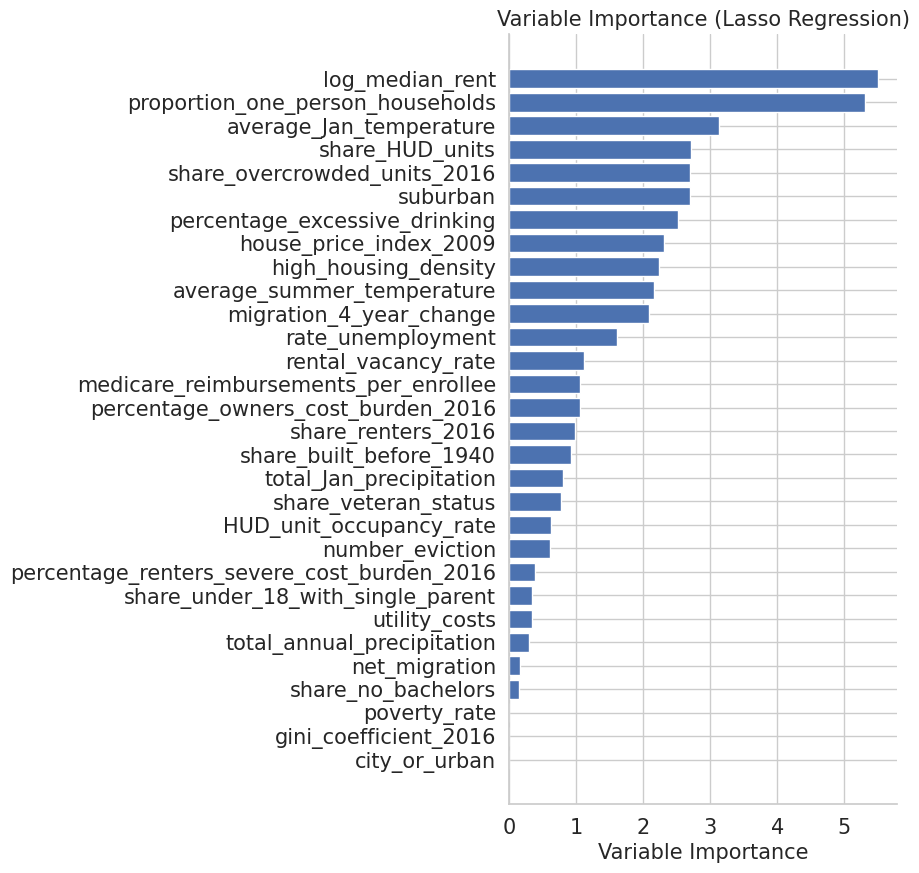

In [ ]:
lasso_reg = Lasso(alpha=lassocv.alpha_).fit(X_train, Y_train)

importances_lasso = np.abs(lasso_reg.coef_)

df_lasso = pd.DataFrame({'Variable': X.columns, 'Importance': importances_lasso})
df_lasso_sorted = df_lasso.sort_values(by='Importance')

fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(df_lasso_sorted['Variable'], df_lasso_sorted['Importance'], color='b')
ax.set_xlabel('Variable Importance', fontsize=15)
ax.set_ylabel('')
ax.set_title('Variable Importance (Lasso Regression)', fontsize=15)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

You can see from the output there are some notable variables that carry some importance towards its effect on homelessness rates. This includes: log_median_rent, proportion_one_person_households, average_Jan_temperature, share_HUD_units, and share_overcrowded_units_2016.

Here I am finding the Mean Squared Error, Root Mean Squared Error, and the R-Squared value.

In [ ]:
MSE_lasso = mean_squared_error(Y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(Y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 314.849  RMSE = 17.744  R-squared = 0.405


What is outputted here are three different values that represent performance metrics for evaluating the regression model.

- MSE indicates that, on average, the squared difference between the predicted values and the actual values is 314.849. A lower MSE indicates better model performance, as it means the predictions are closer to the actual values. So this shows that this model isn't the best.

- RMSE indicates that, on average, the difference between the predicted values and the actual values is approximately 17.744. Like the MSE, a lower RMSE indicates better model performance, so another reinforcement that this model isn't the best.

- R-Squared indicates that approximately 40.5% of the variance in the rate of homelessness can be explained by the X values. Also not as high of a number.

### Ridge Regression

Here I am creating an array of possible alpha values and plotting a visualization to showcase the alpha values vs. the coefficients.

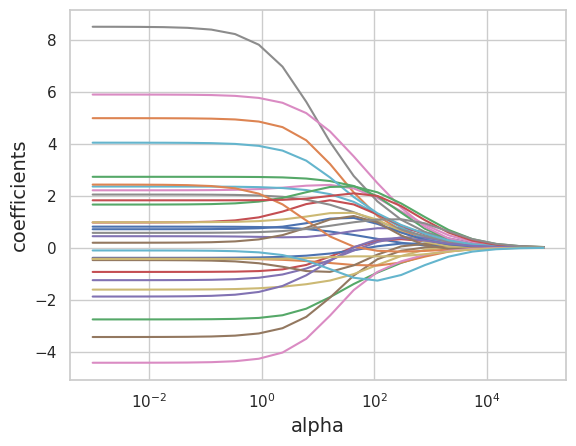

In [ ]:
alphasR = 10**np.linspace(-3,5,20)
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphasR:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphasR, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Here I am doing a 5-fold cross validation to find alpha

In [ ]:
ridgecv = RidgeCV(alphas = alphasR, cv = 5, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, Y_train);
ridgecv.alpha_

42.81332398719396

This is the estimated best alpha value which will be used to provide the optimal trade-off between model complexity and goodness of fit for the Lasso regression.

Here I am fitting the ridge model on the training data with the best alpha and examining the best variables.

<ipython-input-17-ed5a9b8f1e4f>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


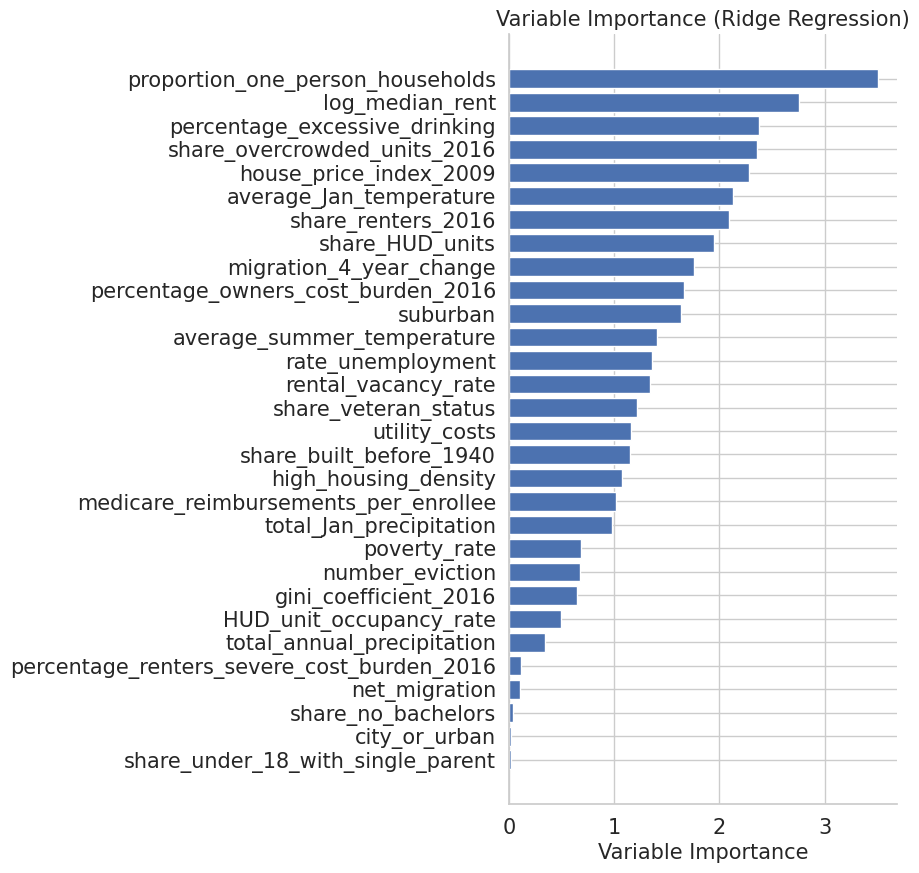

In [ ]:
ridge_reg = Ridge(alpha=ridgecv.alpha_).fit(X_train, Y_train)

importances_ridge = np.abs(ridge_reg.coef_)

df_ridge = pd.DataFrame({'Variable': X.columns, 'Importance': importances_ridge})
df_ridge_sorted = df_ridge.sort_values(by='Importance')

fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(df_ridge_sorted['Variable'], df_ridge_sorted['Importance'], color='b')
ax.set_xlabel('Variable Importance', fontsize=15)
ax.set_ylabel('')
ax.set_title('Variable Importance (Ridge Regression)', fontsize=15)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

You can see from the output there are some notable variables that carry some importance towards its effect on homelessness rates. This includes: log_median_rent, proportion_one_person_households, percentage_excessive_drinking, house_price_index_2009, and share_overcrowded_units_2016.

Here I am finding the Mean Squared Error, Root Mean Squared Error, and the R-Squared value.

In [ ]:
MSE_ridge = mean_squared_error(Y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(Y_test, ridge_reg.predict(X_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 329.614  RMSE = 18.155  R-squared = 0.377


What is outputted here are three different values that represent performance metrics for evaluating the regression model.

- MSE indicates that, on average, the squared difference between the predicted values and the actual values is 329.614. A lower MSE indicates better model performance, as it means the predictions are closer to the actual values. So this shows that this model isn't the best.

- RMSE indicates that, on average, the difference between the predicted values and the actual values is approximately 18.155. Like the MSE, a lower RMSE indicates better model performance, so another reinforcement that this model isn't the best.

- R-Squared indicates that approximately 37.7% of the variance in the rate of homelessness can be explained by the X values. Also not as high of a number.

### XGBoost

Here I am performing a randomized search for hyperparameter tuning of an XGBoost regression model. After completion I will be able to access the best hyperparameters and best model to help predict the rate of homelessness.

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f233d00f280>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f233cf6ffa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f233d069c30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f233cf6c790>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

Here I am creating a regression model, tuning the hyperparameters created from the previous step, and training the model to make predictions on the test data.

In [ ]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
model_xgb.set_params(**search.best_params_)
model_xgb.fit(X_train, Y_train)
y_pred_xgb = model_xgb.predict(X_test)

Here I am creating a scatter plot to visualize the relationship between the actual target values and the predicted target values obtained from the XGBoost regression model.

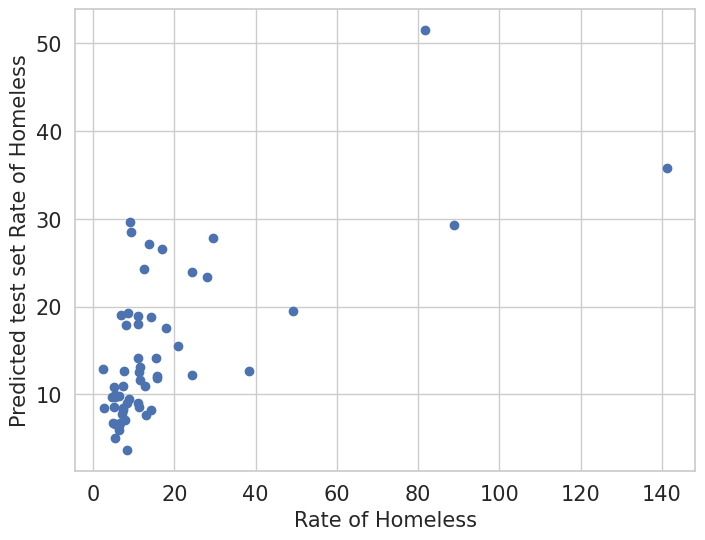

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(Y_test, y_pred_xgb, 'o');

plt.xlabel('Rate of Homeless', fontsize = 15)
plt.ylabel('Predicted test set Rate of Homeless', fontsize = 15)

plt.tick_params(labelsize = 15)

From the visualization we can see there a few outliers, most likely from heavily populated areas, but for the most part the values are fairly close together almost making a straight line up.

Here I am finding the Mean squared error and the mean absolute error.

In [ ]:
mean_squared_error(Y_test, y_pred_xgb, squared = False).round(3)

18.482

In [ ]:
mean_absolute_error(Y_test, y_pred_xgb).round(3)

8.765

Both of these values are fairly low, meaning that the XGBoost regression model has a good performance, having smaller differences between the predicted and actual values.

Here I am creating a visualization to highlight the differences between the variables importance on the homelessness rate.

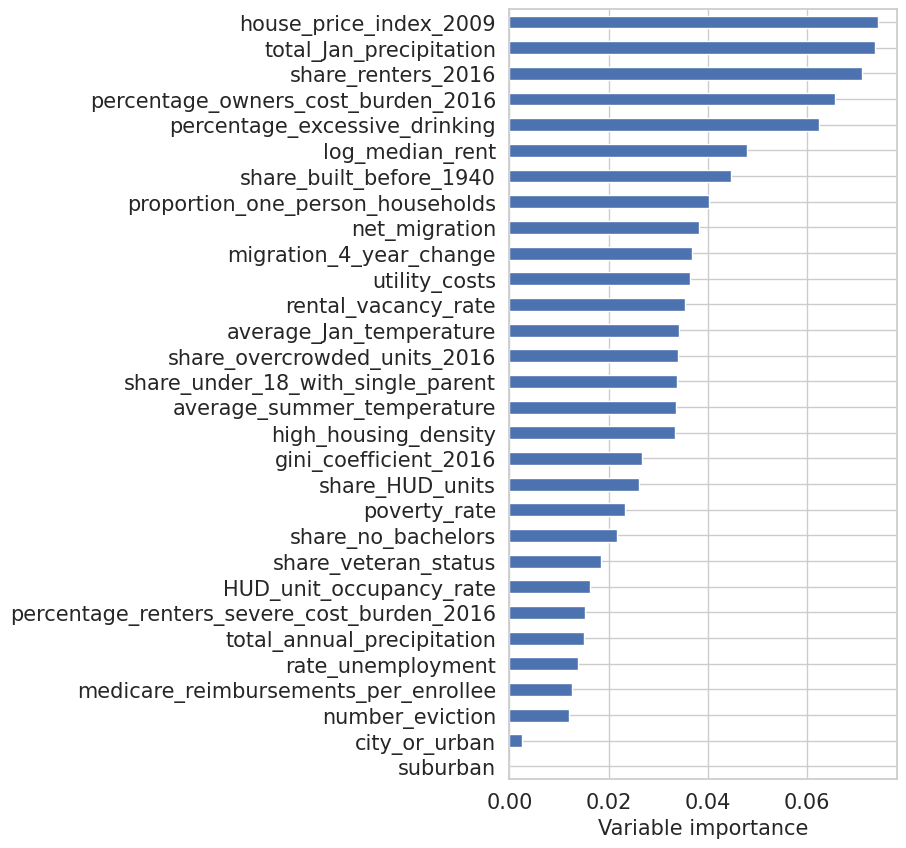

In [ ]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (5,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

The visualization shows share_renters_2016, suburban, percentage_owners_cost_burden_2016, percentage_renters_severe_cost_burden_2016, and total_Jan_precipitation are the 5 most significant variables on the homelessness rate. 

### Cross Validation K-fold CV

In [ ]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

# Initialize a list to record the RMSE
tree_rmse_kfold = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the k-folds object with the number of splits
kf = KFold(n_splits=10)

# Loop over all splits
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index,:]
    Y_train = Y.iloc[train_index]

    X_test = X.iloc[test_index,:]
    Y_test = Y.iloc[test_index]

    # Do the cross validation
    modelCV = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error').fit(X_train, Y_train)

    # Get the scores
    scores = modelCV.cv_results_["mean_test_score"]

    # Get the best value of alpha
    best_tree = modelCV.best_params_['max_depth']

    # Fit the best model
    tree_model = tree.DecisionTreeRegressor(max_depth=best_tree)

    tree_model.fit(X_train, Y_train)

    # Predict
    Y_prediction = tree_model.predict(X_test)

    tree_rmse_kfold.append(mean_squared_error(Y_test, Y_prediction, squared=False))

Here I am plotting the importance of the variables from the K-fold

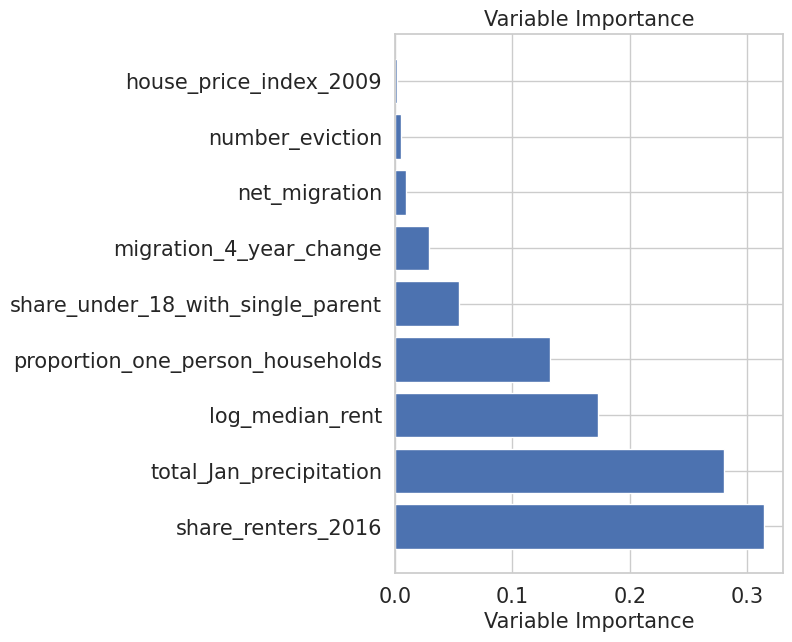

In [ ]:
df_importances = pd.DataFrame({'Variable': X.columns, 'Importance': tree_model.feature_importances_})
df_importances_sorted = df_importances[df_importances['Importance'] > 0].sort_values(by='Importance')

plt.figure(figsize=(5, 7))
plt.barh(df_importances_sorted['Variable'], df_importances_sorted['Importance'], color='b')
plt.ylabel('')
plt.xlabel('Variable Importance', fontsize=15)
plt.title('Variable Importance', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True, axis='x')
plt.gca().invert_yaxis()

plt.show()

You can see here that there are less variables that showed importance, some being: Share_renters_2016, total_Jan_precipitation, proportion_one_person_households, log_median_rent, and migration_4_year_change.

Here I am calculating the mean squared error and the root mean squared error.

In [ ]:
mse_kfold = np.mean(np.square(tree_rmse_kfold))
rmse_kfold = np.sqrt(mse_kfold)

print('MSE:', mse_kfold.round(3))
print('RMSE:', rmse_kfold.round(3))

MSE: 261.853
RMSE: 16.182


What is outputted here are three different values that represent performance metrics for evaluating the regression model.

- MSE indicates that, on average, the squared difference between the predicted values and the actual values is 297.508. A lower MSE indicates better model performance, as it means the predictions are closer to the actual values. So this shows that this model isn't the best.

- RMSE indicates that, on average, the difference between the predicted values and the actual values is approximately 17.248. Like the MSE, a lower RMSE indicates better model performance, so another reinforcement that this model isn't the best.

## Additional Proposal

We were tasked with trying to answer an additional question. I decided to see how a changing the Y variable (rate of homelessness) by taking the log would affect the market factors.

Luckily, I do not need to source any new data as I just need to take the log of the rate_homeless before performing my regression models.

### Analysis

Below will be a repeat of the same analysis I performed above but with the changed Y value to become Y2.

In [ ]:
Y2 = np.log(Y)
scaler = RobustScaler().fit(X)
X = pd.DataFrame(data=scaler.transform(X), columns=X.columns.values, index=X.index)

In [ ]:
model = sm.OLS(Y2, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     16.26
Date:                Wed, 24 May 2023   Prob (F-statistic):           3.11e-49
Time:                        08:19:00   Log-Likelihood:                -242.79
No. Observations:                 374   AIC:                             547.6
Df Residuals:                     343   BIC:                             669.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=.15, random_state = 23)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

In [ ]:
MSE = mean_squared_error(Y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(Y_test, model.predict(sm.add_constant(X_test)))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), 'R-squared =', R_squared.round(3))

MSE = 0.251  RMSE = 0.501 R-squared = 0.589


### Lasso Regression

In [ ]:
alphasL = 10**np.linspace(-4,0,10)
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, Y_train)
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, Y_train)

<ipython-input-33-51bcd3c10554>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


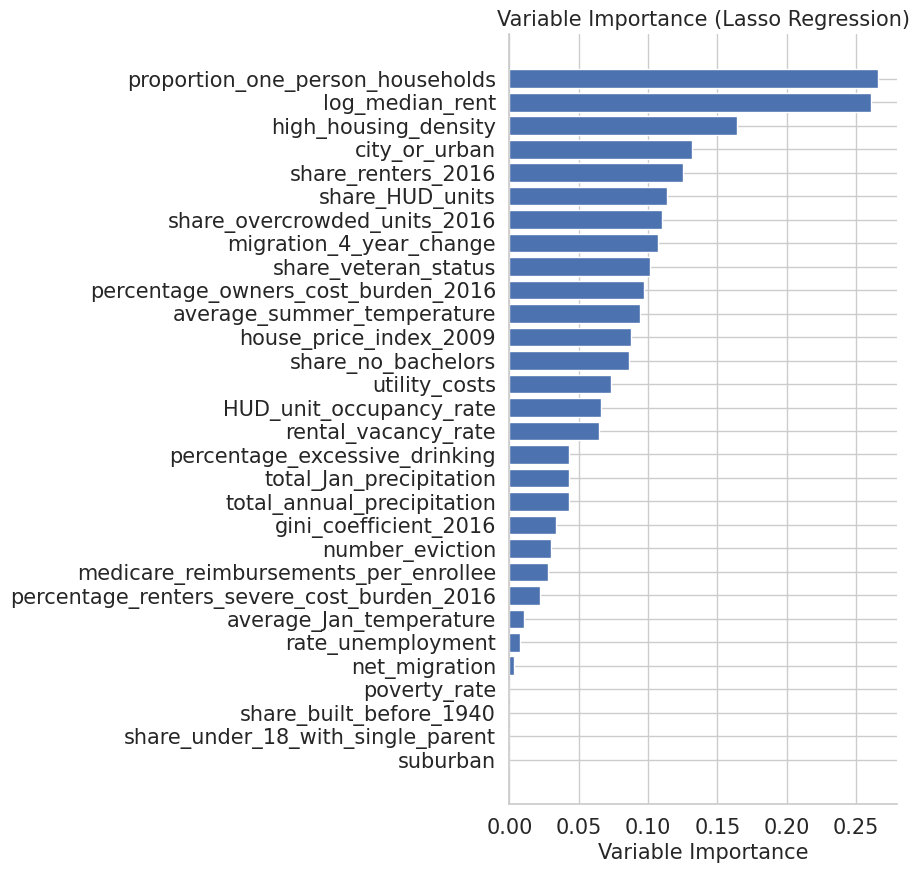

In [ ]:
lasso_reg = Lasso(alpha=lassocv.alpha_).fit(X_train, Y_train)

importances_lasso = np.abs(lasso_reg.coef_)

df_lasso = pd.DataFrame({'Variable': X.columns, 'Importance': importances_lasso})
df_lasso_sorted = df_lasso.sort_values(by='Importance')

fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(df_lasso_sorted['Variable'], df_lasso_sorted['Importance'], color='b')
ax.set_xlabel('Variable Importance', fontsize=15)
ax.set_ylabel('')
ax.set_title('Variable Importance (Lasso Regression)', fontsize=15)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
MSE_lasso = mean_squared_error(Y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(Y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 0.257  RMSE = 0.507  R-squared = 0.579


### Ridge Regression

In [ ]:
alphasR = 10**np.linspace(-3,5,20)
ridgecv = RidgeCV(alphas = alphasR, cv = 5, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, Y_train);
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(X_train, Y_train)

<ipython-input-36-ed5a9b8f1e4f>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


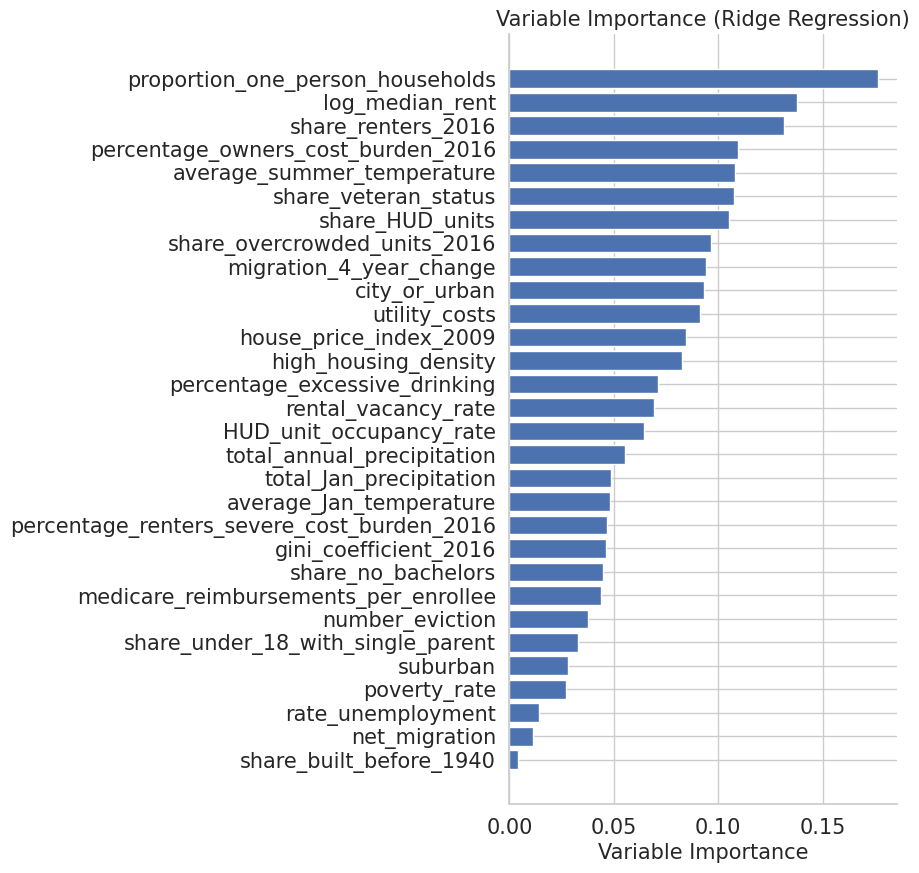

In [ ]:
ridge_reg = Ridge(alpha=ridgecv.alpha_).fit(X_train, Y_train)

importances_ridge = np.abs(ridge_reg.coef_)

df_ridge = pd.DataFrame({'Variable': X.columns, 'Importance': importances_ridge})
df_ridge_sorted = df_ridge.sort_values(by='Importance')

fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(df_ridge_sorted['Variable'], df_ridge_sorted['Importance'], color='b')
ax.set_xlabel('Variable Importance', fontsize=15)
ax.set_ylabel('')
ax.set_title('Variable Importance (Ridge Regression)', fontsize=15)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
MSE_ridge = mean_squared_error(Y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(Y_test, ridge_reg.predict(X_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 0.278  RMSE = 0.527  R-squared = 0.545


### XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f233c4725f0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f233c22bdf0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f233c473370>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f233c34a110>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
model_xgb.set_params(**search.best_params_)
model_xgb.fit(X_train, Y_train)
y_pred_xgb = model_xgb.predict(X_test)

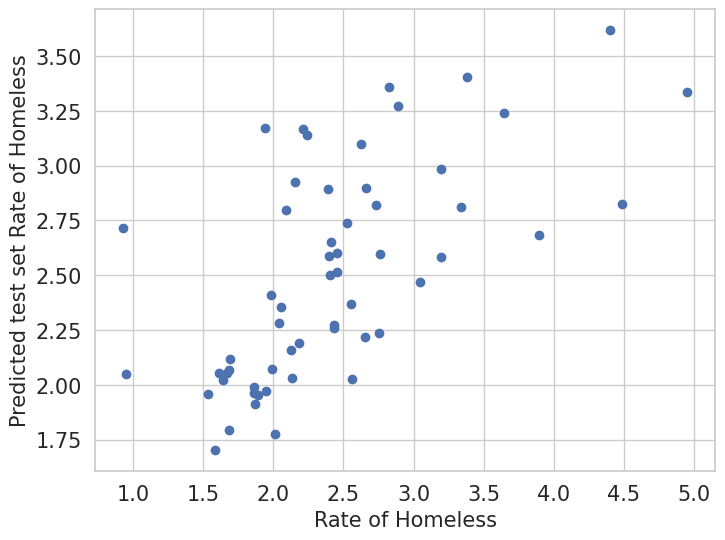

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(Y_test, y_pred_xgb, 'o');

plt.xlabel('Rate of Homeless', fontsize = 15)
plt.ylabel('Predicted test set Rate of Homeless', fontsize = 15)

plt.tick_params(labelsize = 15)

In [ ]:
mean_squared_error(Y_test, y_pred_xgb, squared = False).round(3)

0.605

In [ ]:
mean_absolute_error(Y_test, y_pred_xgb).round(3)

0.436

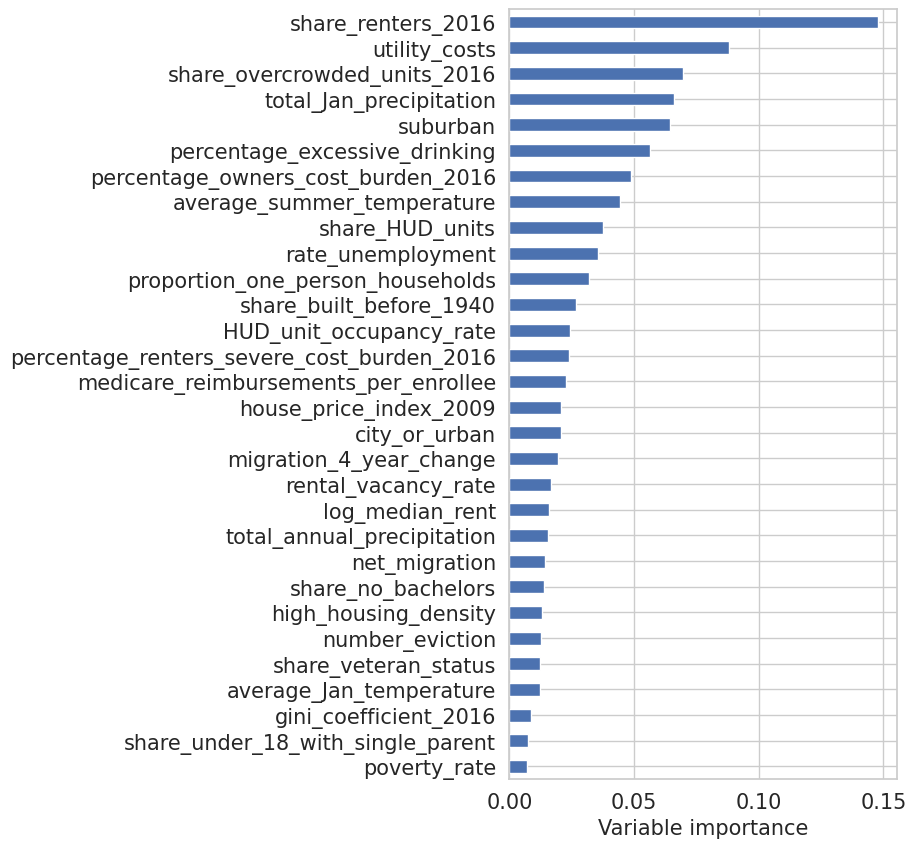

In [ ]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (5,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

### Cross Validation K-fold CV

In [ ]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

# Initialize a list to record the RMSE
tree_rmse_kfold = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the k-folds object with the number of splits
kf = KFold(n_splits=10)

# Loop over all splits
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index,:]
    Y_train = Y.iloc[train_index]

    X_test = X.iloc[test_index,:]
    Y_test = Y.iloc[test_index]

    # Do the cross validation
    modelCV = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error').fit(X_train, Y_train)

    # Get the scores
    scores = modelCV.cv_results_["mean_test_score"]

    # Get the best value of alpha
    best_tree = modelCV.best_params_['max_depth']

    # Fit the best model
    tree_model = tree.DecisionTreeRegressor(max_depth=best_tree)

    tree_model.fit(X_train, Y_train)

    # Predict
    Y_prediction = tree_model.predict(X_test)

    tree_rmse_kfold.append(mean_squared_error(Y_test, Y_prediction, squared=False))

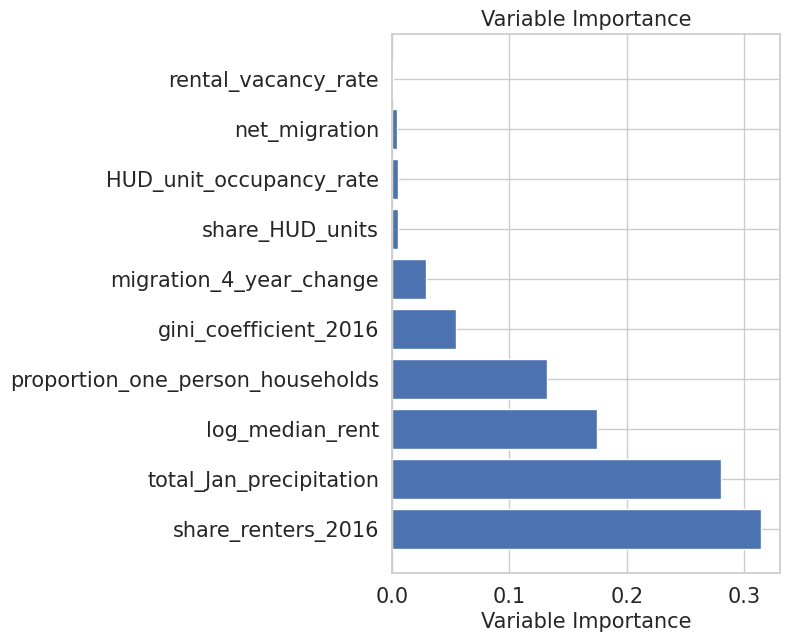

In [ ]:
df_importances = pd.DataFrame({'Variable': X.columns, 'Importance': tree_model.feature_importances_})
df_importances_sorted = df_importances[df_importances['Importance'] > 0].sort_values(by='Importance')

plt.figure(figsize=(5, 7))
plt.barh(df_importances_sorted['Variable'], df_importances_sorted['Importance'], color='b')
plt.ylabel('')
plt.xlabel('Variable Importance', fontsize=15)
plt.title('Variable Importance', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True, axis='x')
plt.gca().invert_yaxis()

plt.show()

In [ ]:
mse_kfold = np.mean(np.square(tree_rmse_kfold))
rmse_kfold = np.sqrt(mse_kfold)

print('MSE:', mse_kfold.round(3))
print('RMSE:', rmse_kfold.round(3))

MSE: 269.099
RMSE: 16.404


## Conclusion

- After taking a look at all of the different regression models and their MSE, RMSE, variable importance, and overall effectiveness. I can start answering my analysis questions. XGBoost provided the best MSE value at 18.482 and MAE value at 8.765 showcasing that regression model had a good performance as well as a good comparison between the predicted and actual values of the homelessness rate. It also held 3 of the 5 most significant variables being house_price_index_2009, total_jan_precipitation, and share_renters_2016 only leaving out log_median_rent, proportion_one_person_household out of the top 5 but log_median_rent being number 6 and proportion_one_person_household being number 8 in the XGBoost model.

- Taking a look at the original model's p-values and our best regression model the XGBoost compared to the other regression models I discovered that the most effective variables and best predictors on the homelessness rate are: house_price_index_2009, total_jan_precipitation, share_renters_2016, log_median_rent, and proportion_one_person_household.  

### Additional Proposal Conclusion:

- After performing my additional proposal which was performing a log scalar on the rate of homelessness I discovered a few different results then the original proposal. The MSE values of all of the regression models lowered to a significantlly small number indicating a better performance of the regression model, although XGBoost isn't the best regression model it is the original regression model train test split with a MSE of 0.251 and RMSE of 0.501.

- The best predictors and variables of importance discovered are proportion_one_person_household, utility_costs, log_median_rent, share_renters_2016, and total_Jan_precipitation. Which 4 out of the 5 matches with the original proposal best predictors and most effective variables, reinforcing the best variables. 